# Kernelized SVM

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [4]:
import numpy as np
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


scaled_svc = make_pipeline(StandardScaler(), SVC())

In [5]:
np.set_printoptions(precision=6, suppress=True)
param_grid = {'svc__C': np.logspace(-3, 3, 7),
              'svc__gamma': np.logspace(-3, 3, 7) / X_train.shape[0]}
param_grid

{'svc__C': array([   0.001,    0.01 ,    0.1  ,    1.   ,   10.   ,  100.   ,
        1000.   ]),
 'svc__gamma': array([0.000001, 0.000007, 0.000074, 0.000742, 0.007424, 0.074239,
        0.74239 ])}

In [6]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(scaled_svc, param_grid=param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': array([   0.001,    0.01 ,    0.1  ,    1.   ,   10.   ,  100.   ,
       1000.   ]),
                         'svc__gamma': array([0.000001, 0.000007, 0.000074, 0.000742, 0.007424, 0.074239,
       0.74239 ])},
             return_train_score=True)

In [7]:
import pandas as pd
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__gamma,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.104324,0.002684,0.015256,4.590704e-04,0.001,7.4239e-07,"{'svc__C': 0.001, 'svc__gamma': 7.423904974016...",0.385185,0.355556,0.318519,...,0.359736,0.202145,0.101485,0.101485,0.176568,0.102226,0.102226,0.102226,0.198407,0.114317
1,0.103929,0.001881,0.015459,6.691726e-04,0.001,7.4239e-06,"{'svc__C': 0.001, 'svc__gamma': 7.423904974016...",0.385185,0.362963,0.318519,...,0.362211,0.202145,0.101485,0.101485,0.176568,0.102226,0.102226,0.102226,0.198655,0.114658
2,0.104820,0.001753,0.015366,4.890154e-04,0.001,7.4239e-05,"{'svc__C': 0.001, 'svc__gamma': 7.423904974016...",0.385185,0.355556,0.333333,...,0.367162,0.202145,0.101485,0.101485,0.174092,0.102226,0.102226,0.102226,0.199645,0.116502
3,0.104717,0.001845,0.015162,3.979670e-04,0.001,0.00074239,"{'svc__C': 0.001, 'svc__gamma': 0.000742390497...",0.385185,0.362963,0.370370,...,0.375413,0.199670,0.101485,0.101485,0.178218,0.102226,0.102226,0.102226,0.201460,0.118803
4,0.104805,0.000940,0.015267,4.521242e-04,0.001,0.0074239,"{'svc__C': 0.001, 'svc__gamma': 0.007423904974...",0.392593,0.385185,0.377778,...,0.390264,0.202970,0.101485,0.101485,0.196370,0.102226,0.102226,0.102226,0.208061,0.125051
5,0.104321,0.001804,0.015156,4.084890e-04,0.001,0.074239,"{'svc__C': 0.001, 'svc__gamma': 0.074239049740...",0.303704,0.318519,0.318519,...,0.363036,0.193069,0.101485,0.101485,0.174917,0.102226,0.102226,0.102226,0.192054,0.106737
6,0.105126,0.002152,0.015256,4.592021e-04,0.001,0.74239,"{'svc__C': 0.001, 'svc__gamma': 0.742390497401...",0.140741,0.140741,0.155556,...,0.405941,0.202970,0.101485,0.101485,0.202970,0.102226,0.102226,0.102226,0.213341,0.131743
7,0.107114,0.001794,0.015256,4.589551e-04,0.01,7.4239e-07,"{'svc__C': 0.01, 'svc__gamma': 7.4239049740163...",0.385185,0.355556,0.318519,...,0.359736,0.202145,0.101485,0.101485,0.176568,0.102226,0.102226,0.102226,0.198407,0.114317
8,0.104820,0.001764,0.015063,5.312669e-04,0.01,7.4239e-06,"{'svc__C': 0.01, 'svc__gamma': 7.4239049740163...",0.385185,0.362963,0.318519,...,0.362211,0.202145,0.101485,0.101485,0.176568,0.102226,0.102226,0.102226,0.198655,0.114658
9,0.105315,0.001790,0.015661,8.954700e-04,0.01,7.4239e-05,"{'svc__C': 0.01, 'svc__gamma': 7.4239049740163...",0.385185,0.355556,0.333333,...,0.367162,0.202145,0.101485,0.101485,0.174092,0.102226,0.102226,0.102226,0.199645,0.116502


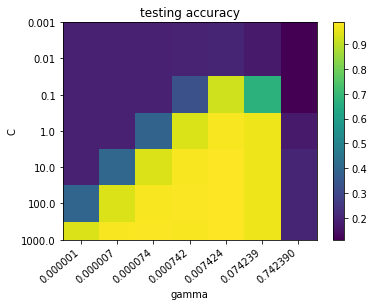

In [8]:
plt.title("testing accuracy")
plt.imshow(results.mean_test_score.values.reshape(7, 7))
plt.yticks(range(len(param_grid['svc__C'])), param_grid['svc__C'])
plt.ylabel("C")
plt.xticks(range(len(param_grid['svc__gamma'])), ["{:.6f}".format(g) for g in param_grid['svc__gamma']], rotation=40, ha="right")
plt.xlabel("gamma")
plt.colorbar()

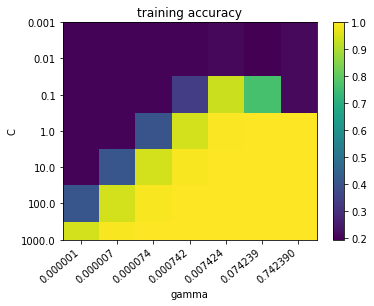

In [9]:
plt.title("training accuracy")
plt.imshow(results.mean_train_score.values.reshape(7, 7))
plt.yticks(range(len(param_grid['svc__C'])), param_grid['svc__C'])
plt.ylabel("C")
plt.xticks(range(len(param_grid['svc__gamma'])), ["{:.6f}".format(g) for g in param_grid['svc__gamma']], rotation=40, ha="right")
plt.xlabel("gamma")
plt.colorbar()

In [10]:
grid.best_params_

{'svc__C': 100.0, 'svc__gamma': 0.007423904974016332}

In [11]:
print("Best estimator:\n{}".format(grid.best_estimator_))

Best estimator:
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=100.0, gamma=0.007423904974016332))])


In [12]:
accuracy = grid.score(X_test, y_test)
print('Accuracy score of the {} is {:.3f}'.format(grid.__class__.__name__, accuracy))

Accuracy score of the GridSearchCV is 0.982
